In [1]:
#This notebook is looking at who achieves credit WEc2

In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import pandas.io.sql as pdsql
import plotly.plotly as py
from plotly.graph_objs import *
import seaborn as sns

In [3]:
%matplotlib inline 

In [4]:
public_data = pd.read_csv('all_projects_dataframe.csv')

/Users/trippshealy/iron_yard/week10/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
public_data.head()

,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,Country,LEEDSystemVersionDisplayName,PointsAchieved,CertLevel,CertDate,IsCertified,OwnerTypes,GrossSqFoot,TotalPropArea,ProjectTypes,OwnerOrganization,RegistrationDate
0,10000000,No,PNC Firstside Center,21 South Putt Corners Road,Pittsburgh,PA,15219,US,LEED-NC 2.0,33,Silver,10/1/00 0:00,Yes,Profit Org.,647000,202923,Commercial Office,L.D. Astorino Companies,3/31/00 0:00
1,10000001,Yes,Confidential,Confidential,Confidential,IN,Confidential,US,LEED-NC 2.0,NaN,NaN,NaN,No,Confidential,291000,130637,Commercial Office,Confidential,6/1/00 0:00
2,10000002,No,Bethel Commercial Center,53 W. Jackson,Chicago,IL,60604,US,LEED-NC 2.0,45,Gold,11/5/07 0:00,Yes,Non-Profit Org.,22592,27500,"Commercial Office, Restaurant, Retail, Daycare...",Bethel New Life,8/1/01 0:00
3,10000003,Yes,Confidential,Confidential,Confidential,NY,Confidential,US,LEED-NC 2.1,NaN,NaN,NaN,No,Confidential,190000,NaN,NaN,Confidential,9/19/06 0:00
4,10000004,No,The Chicago Center for Green Technology,445 N. Sacramento Avenue,Chicago,IL,60612,US,LEED-NC 1.0 Pilot,38,Platinum,6/17/03 0:00,Yes,Local Government,28356,130637,"Industrial, Commercial Office",City of Chicago Department of the Enviro,6/1/00 0:00


In [6]:
conn = psycopg2.connect(database="builditgreen")

In [7]:
scores_2009_df = pdsql.read_frame("SELECT * FROM %s;" % 'api_score2009', conn)

/Users/trippshealy/iron_yard/week10/builditgreen/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/sql.py:1630: FutureWarning:

read_frame is deprecated, use read_sql



In [8]:
scores_2009_df.project_id[5]

1000000224

In [9]:
scores_2009_df.head()

,id,ssc1,ssc2,ssc3,ssc4_1,ssc4_2,ssc4_3,ssc4_4,ssc5_1,ssc5_2,...,ssc5_1_possible,ssc5_2_possible,ssc6_1_possible,ssc6_2_possible,ssc7_1_possible,ssc7_2_possible,ssc8_possible,wec1_possible,wec2_possible,wec3_possible
0,1,1,5,0,6,0,0,2,0,1,...,1,1,1,1,1,1,1,4,2,4
1,2,0,0,0,6,1,0,0,0,1,...,1,1,1,1,1,1,1,4,2,4
2,3,1,5,0,0,1,3,2,0,0,...,1,1,1,1,1,1,1,4,2,4
3,4,1,0,0,0,1,3,0,0,1,...,1,1,1,1,1,1,1,4,2,4
4,5,1,5,0,6,1,3,2,0,0,...,1,1,1,1,1,1,1,4,2,4


In [10]:
scores_2009_df.rename(columns={'project_id':'ID'}, inplace=True)

In [11]:
scores_2009_df['ID'].head()

0    1000000143
1    1000000174
2    1000000194
3    1000000199
4    1000000222
Name: ID, dtype: int64

In [12]:
public_data.ID[:5]

0    10000000
1    10000001
2    10000002
3    10000003
4    10000004
Name: ID, dtype: int64

In [13]:
# leed_2009_w_credits = pd.merge(public_data, scores_2009_df, on='ID')
# leed_2009_w_credits = scores_2009_df.join(public_data, on='ID')
leed_2009_w_credits = pd.merge(public_data, scores_2009_df, on='ID', how='right')

In [14]:
leed_2009_w_credits.shape

(2501, 124)

In [15]:
leed_2009_w_credits.columns[-52:]

Index(['eac1_possible', 'eac2_possible', 'eac3_possible', 'eac4_possible',
       'eac5_possible', 'eac6_possible', 'eqc1_possible', 'eqc2_possible',
       'eqc3_1_possible', 'eqc3_2_possible', 'eqc4_1_possible',
       'eqc4_2_possible', 'eqc4_3_possible', 'eqc4_4_possible',
       'eqc5_possible', 'eqc6_1_possible', 'eqc6_2_possible',
       'eqc7_1_possible', 'eqc7_2_possible', 'eqc8_1_possible',
       'eqc8_2_possible', 'extra1_possible', 'extra2_possible',
       'extra3_possible', 'extra4_possible', 'idc1_possible', 'idc2_possible',
       'mrc1_1_possible', 'mrc1_2_possible', 'mrc2_possible', 'mrc3_possible',
       'mrc4_possible', 'mrc5_possible', 'mrc6_possible', 'mrc7_possible',
       'ssc1_possible', 'ssc2_possible', 'ssc3_possible', 'ssc4_1_possible',
       'ssc4_2_possible', 'ssc4_3_possible', 'ssc4_4_possible',
       'ssc5_1_possible', 'ssc5_2_possible', 'ssc6_1_possible',
       'ssc6_2_possible', 'ssc7_1_possible', 'ssc7_2_possible',
       'ssc8_possible', 'wec1_

In [16]:
meet_wec2 = leed_2009_w_credits[(leed_2009_w_credits['wec2'] > 0) & (leed_2009_w_credits['Country'] == 'US')]

In [17]:
meet_wec2.shape

(223, 124)

In [18]:
meet_wec2 = meet_wec2.iloc[:,:72]

In [19]:
meet_wec2.shape

(223, 72)

In [20]:
meet_wec2.columns

Index(['ID', 'Isconfidential', 'ProjectName', 'Street', 'City', 'State',
       'Zipcode', 'Country', 'LEEDSystemVersionDisplayName', 'PointsAchieved',
       'CertLevel', 'CertDate', 'IsCertified', 'OwnerTypes', 'GrossSqFoot',
       'TotalPropArea', 'ProjectTypes', 'OwnerOrganization',
       'RegistrationDate', 'id', 'ssc1', 'ssc2', 'ssc3', 'ssc4_1', 'ssc4_2',
       'ssc4_3', 'ssc4_4', 'ssc5_1', 'ssc5_2', 'ssc6_1', 'ssc6_2', 'ssc7_1',
       'ssc7_2', 'ssc8', 'wec1', 'wec2', 'wec3', 'eac1', 'eac2', 'eac3',
       'eac4', 'eac5', 'eac6', 'mrc1_1', 'mrc1_2', 'mrc2', 'mrc3', 'mrc4',
       'mrc5', 'mrc6', 'mrc7', 'eqc1', 'eqc2', 'eqc3_1', 'eqc3_2', 'eqc4_1',
       'eqc4_2', 'eqc4_3', 'eqc4_4', 'eqc5', 'eqc6_1', 'eqc6_2', 'eqc7_1',
       'eqc7_2', 'eqc8_1', 'eqc8_2', 'idc1', 'idc2', 'extra1', 'extra2',
       'extra3', 'extra4'],
      dtype='object')

#By State

In [21]:
wec2_by_state = meet_wec2.groupby('State').count()
wec2_by_state

,ID,Isconfidential,ProjectName,Street,City,Zipcode,Country,LEEDSystemVersionDisplayName,PointsAchieved,CertLevel,...,eqc7_1,eqc7_2,eqc8_1,eqc8_2,idc1,idc2,extra1,extra2,extra3,extra4
State,,,,,,,,,,,,,,,,,,,,,
AK,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AL,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AR,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AZ,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,6
CA,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
CO,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
DC,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
DE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


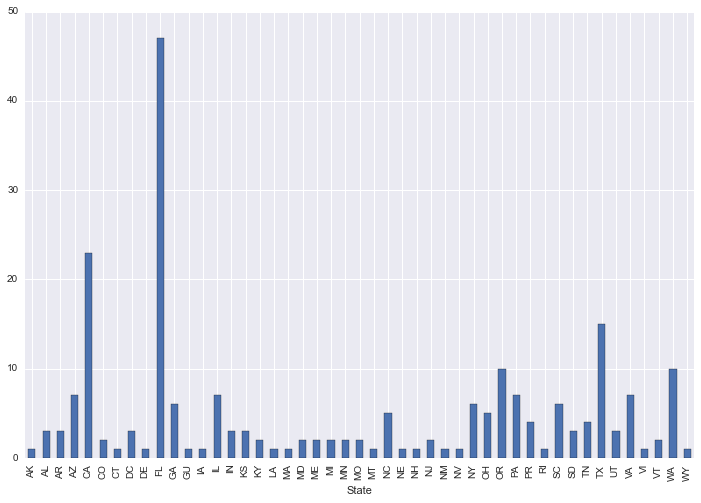

In [22]:
wec2_by_state = wec2_by_state['ID']
wec2_by_state.plot(kind='bar', figsize=(12,8))

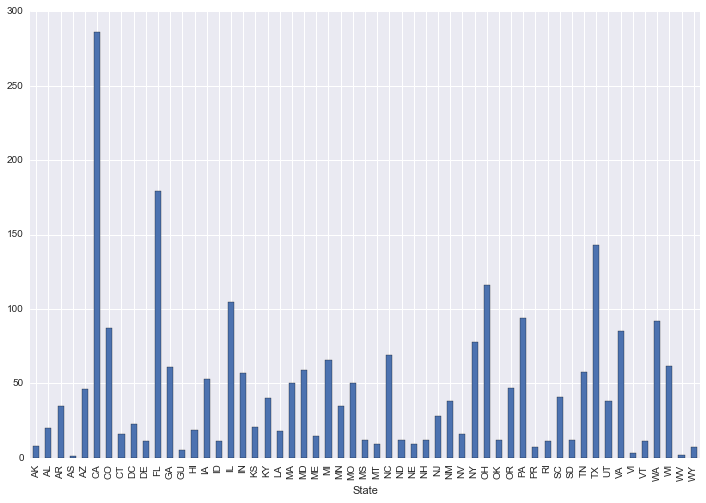

In [23]:
leed_2009_by_state = leed_2009_w_credits.groupby('State').count()["ID"]
leed_2009_by_state.plot(kind='bar', figsize=(12,8))

#By Zipcode

In [24]:
wec2_by_zipcode = meet_wec2.groupby('Zipcode').count()
wec2_by_zipcode

,ID,Isconfidential,ProjectName,Street,City,State,Country,LEEDSystemVersionDisplayName,PointsAchieved,CertLevel,...,eqc7_1,eqc7_2,eqc8_1,eqc8_2,idc1,idc2,extra1,extra2,extra3,extra4
Zipcode,,,,,,,,,,,,,,,,,,,,,
11530,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
11976,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12549,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13760,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
14454-1456,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
14623,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15601,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17401,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18444,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


##Greater than 1 project in the zipcode 

In [25]:
wec2_by_zipcode_gt1 = wec2_by_zipcode[wec2_by_zipcode["ID"] > 1]
wec2_by_zipcode_gt1.shape

(14, 71)

In [26]:
wec2_by_zipcode_gt1

,ID,Isconfidential,ProjectName,Street,City,State,Country,LEEDSystemVersionDisplayName,PointsAchieved,CertLevel,...,eqc7_1,eqc7_2,eqc8_1,eqc8_2,idc1,idc2,extra1,extra2,extra3,extra4
Zipcode,,,,,,,,,,,,,,,,,,,,,
19130,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,1
23604,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
31408,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
32611,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
33025,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
33032,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
33547,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
33950,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
34216,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#By owner type

In [27]:
wec2_by_owner_types = meet_wec2.groupby('OwnerTypes').count()["ID"]

In [28]:
wec2_by_owner_types = wec2_by_owner_types.to_frame()

In [29]:
wec2_by_owner_types = wec2_by_owner_types.rename(columns={"ID": "Number of Projects"})

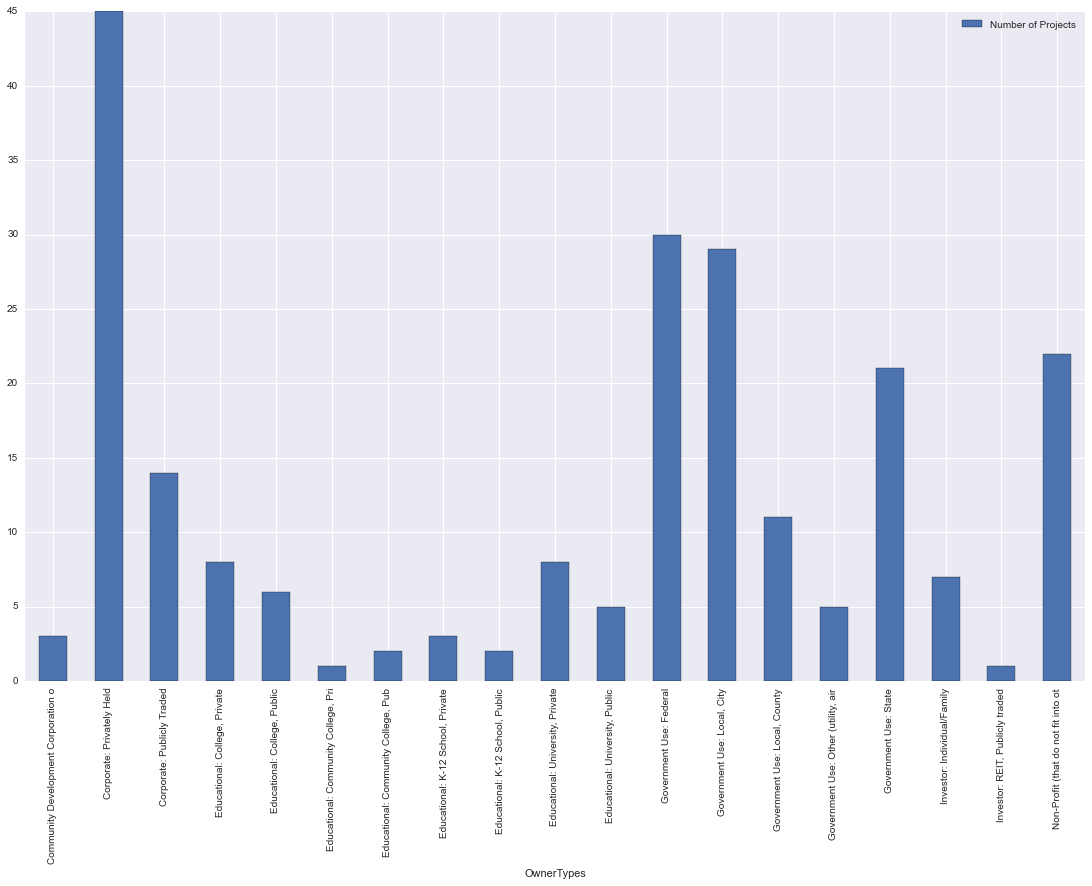

In [30]:
wec2_by_owner_types.plot(kind="bar", figsize=(19,12))

In [31]:
#By level

In [32]:
wec2_by_level = meet_wec2.groupby('CertLevel').count()["ID"]
wec2_by_level = wec2_by_level.to_frame()
wec2_by_level = wec2_by_level.rename(columns={"ID": "Number of Projects"})

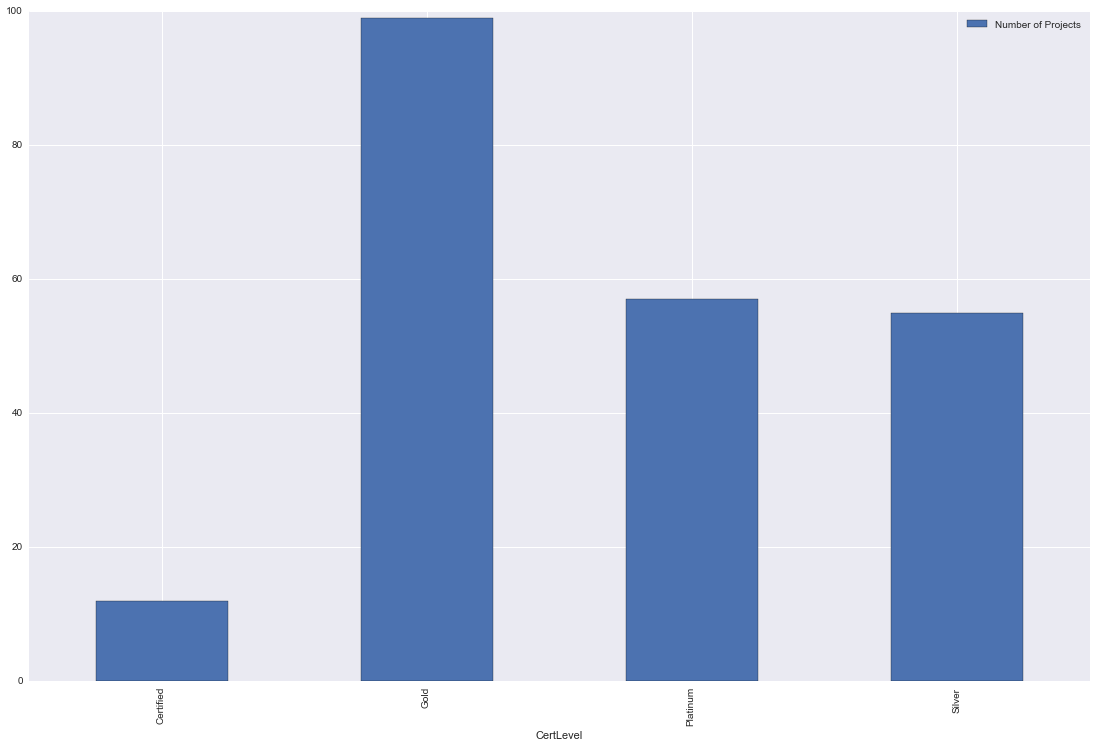

In [33]:
wec2_by_level.plot(kind="bar", figsize=(19,12))

In [34]:
wec2_by_level

,Number of Projects
CertLevel,
Certified,12
Gold,99
Platinum,57
Silver,55


In [35]:
#By Cert Date

In [36]:
wec2_cert_date = [lambda x: x.split()[0] for x in meet_wec2['CertDate']]

In [37]:
wec2_by_date = meet_wec2.groupby('CertDate').count()["ID"]
wec2_by_date = wec2_by_date.to_frame()
wec2_by_date = wec2_by_date.rename(columns={"ID": "Number of Projects"})
wec2_by_date.shape

(194, 1)

#By Squarefoot

In [38]:
wec2_by_sqft = meet_wec2.loc[:,"GrossSqFoot"]

In [39]:
wec2_by_sqft.mean()

65826.67946188341

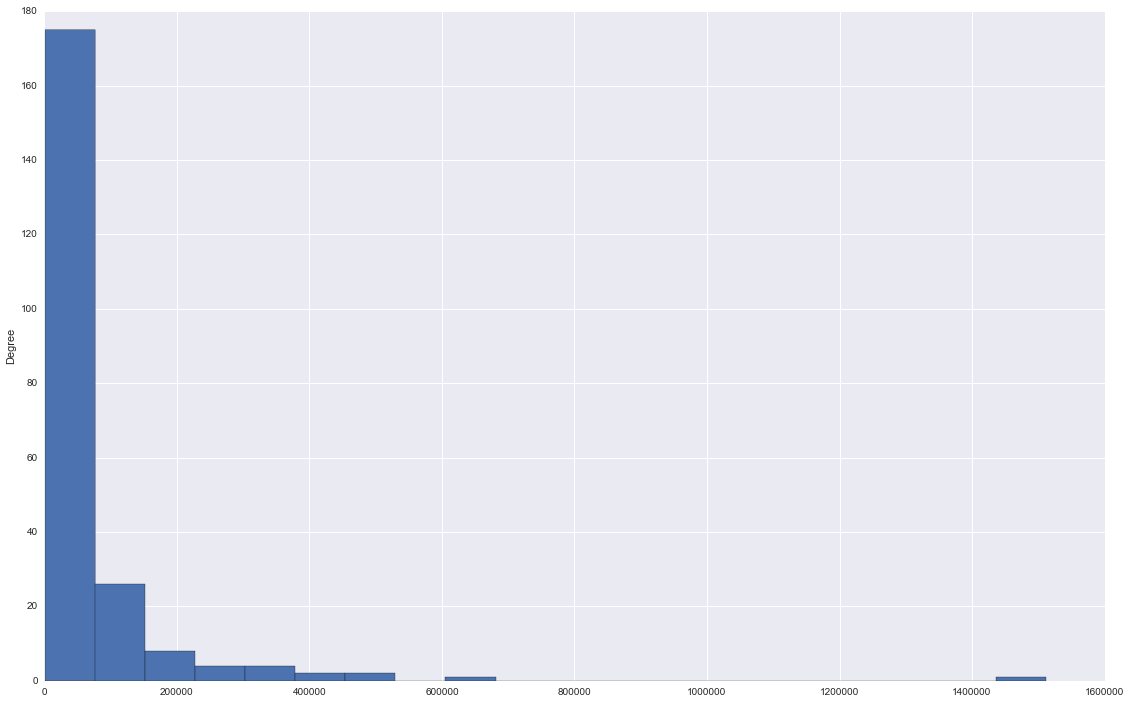

In [40]:
wec2_by_sqft.plot(kind="hist", bins=20, figsize=(19,12))

In [41]:
#

In [42]:
wec2_by_points = meet_wec2.groupby('PointsAchieved').count()["ID"]
wec2_by_points = wec2_by_points.to_frame()
wec2_by_points = wec2_by_points.rename(columns={"ID": "Number of Projects"})

In [43]:
wec2_by_points.head(15)

,Number of Projects
PointsAchieved,
41,1
43,3
45,1
47,1
50,1
53,3
54,2
55,1
56,1


In [44]:
#Looking into projects in florida by zipcode 

In [45]:
meet_wec2_florida = leed_2009_w_credits[(leed_2009_w_credits['wec2'] > 0) & (leed_2009_w_credits['Country'] == 'US') & (leed_2009_w_credits['State'] == 'FL')]

In [46]:
meet_wec2_florida.shape

(47, 124)

In [47]:
meet_wec2_florida_zip = meet_wec2_florida.loc[:,['ID', 'Zipcode']]
meet_wec2_florida_zip = meet_wec2_florida_zip.groupby('Zipcode').count()

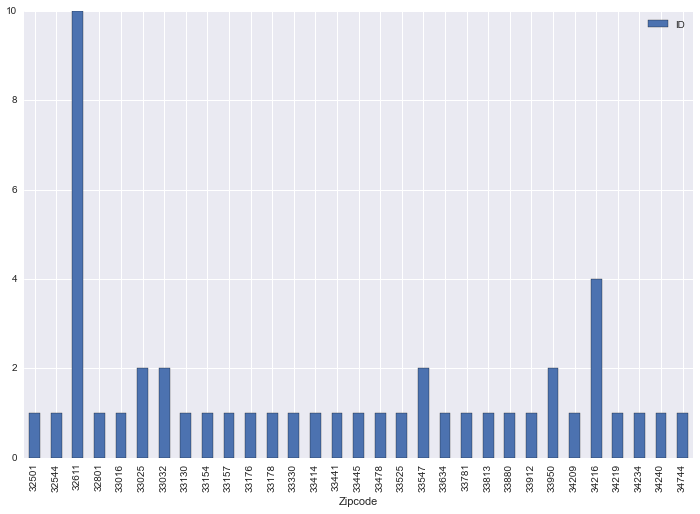

In [48]:
meet_wec2_florida_zip.plot(kind='bar', figsize=(12,8))

In [49]:
#Zipcode
df_num_projects_sorted['text'] = df_num_projects_sorted['City'] + '<br>Number of Projects ' + (df_num_projects_sorted['number of projects']).astype(str)
limits = [(0,6),(6,16),(15,31),(31,51),(51,500)]
colors = ["rgb(0, 255, 181)","rgb(255, 224, 0)","rgb(30, 111, 255)","rgb(235, 108, 72)","rgb(93, 0, 169)"]

cities = []
scale = 15

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_num_projects_sorted[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        sizemode = 'diameter',
        marker = dict( 
            size = df_sub['number of projects']/scale, 
            color = colors[i],
            line = dict(width = 2,color = 'black')
        ),
        name = 'LEED Projects: {0} - {1}'.format(df_num_projects_sorted.iloc[lim[0],7],
                                            df_num_projects_sorted.iloc[lim[1],7]))
    cities.append(city)

layout = dict(
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',       
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"           
        ),  
    )
    
fig = dict( data=cities, layout=layout )
fig['layout'].update(
    autosize=False,  # allow custom size (set already, only for completeness here)
    width=960,    # link new width value
    height=453,  # link new height value
#     font=Font(size=7),       # update global font size
#     titlefont=Font(size=12)  #  as well as the title font size 
)
layout.update(margin=Margin(l=0,r=0,b=0,t=0,pad=0,autoexpand=True))
py.iplot( fig, validate=False, filename='d3-bubble-map-leed-500' )

NameError: name 'df_num_projects_sorted' is not defined

In [51]:
wec2_by_state

State
AK     1
AL     3
AR     3
AZ     7
CA    23
CO     2
CT     1
DC     3
DE     1
FL    47
GA     6
GU     1
IA     1
IL     7
IN     3
KS     3
KY     2
LA     1
MA     1
MD     2
ME     2
MI     2
MN     2
MO     2
MT     1
NC     5
NE     1
NH     1
NJ     2
NM     1
NV     1
NY     6
OH     5
OR    10
PA     7
PR     4
RI     1
SC     6
SD     3
TN     4
TX    15
UT     3
VA     7
VI     1
VT     2
WA    10
WY     1
Name: ID, dtype: int64

In [53]:
wec2_by_state = wec2_by_state.to_frame()

In [54]:
wec2_by_state_id = wec2_by_state.reindex()

In [55]:
wec2_by_state_id['States'] = wec2_by_state_id.index

In [56]:
wec2_by_state_id

,ID,States
State,,
AK,1,AK
AL,3,AL
AR,3,AR
AZ,7,AZ
CA,23,CA
CO,2,CO
CT,1,CT
DC,3,DC
DE,1,DE


In [57]:
#state

df = wec2_by_state_id

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# df['text'] = df['state'] + '<br>' +\
#     'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#     'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#     'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['States'],
        z = df['ID'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Number of Projects"
        )
    ) ]

layout = dict(
        title = 'Innovative Wastewater Technologies (LEED credi WEc2)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
layout.update(margin=Margin(l=0,r=0,b=0,t=0,pad=0,autoexpand=True))    
fig = dict( data=data, layout=layout )
fig['layout'].update(
   autosize=False,  # allow custom size (set already, only for completeness here)
   width=930,    # link new width value
   height=430,  # link new height value
#     font=Font(size=7),       # update global font size
#     titlefont=Font(size=12)  #  as well as the title font size 
)
# py.iplot( fig, validate=False, filename='LEED-WEc2-wastewater-tech-map' )
py.image.save_as({'data': data, 'layout': layout}, 'wec2.jpeg')